In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing the dataset
data = pd.read_csv('./data/movie_metadata.csv')
data.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [4]:
data.shape

(5043, 28)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [6]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [7]:
# Performing EDA on the dataset
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [8]:
data.nunique()  # number of unique values in each column

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          954
language                       47
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

For the recommendation system, I will select some features from the base dataset<br/>
I will be building a content based filter recommendation system.<br/>
Where movies will be recommended based on imdb ratings and genres.<br/>
I for one am a fan on top rated movies.

In [9]:
# Selecting some features from the dataset
features = ['movie_title', 'genres', 'imdb_score', 'movie_imdb_link']

df = data[features].copy()
df.head()

,movie_title,genres,imdb_score,movie_imdb_link
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,7.9,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,7.1,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Action|Adventure|Thriller,6.8,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Action|Thriller,8.5,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,Documentary,7.1,http://www.imdb.com/title/tt5289954/?ref_=fn_t...


In [10]:
df.info() # number of rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_title      5043 non-null   object 
 1   genres           5043 non-null   object 
 2   imdb_score       5043 non-null   float64
 3   movie_imdb_link  5043 non-null   object 
dtypes: float64(1), object(3)
memory usage: 157.7+ KB


In [11]:
df['genres'].value_counts()[:10]

Drama                          236
Comedy                         209
Comedy|Drama                   191
Comedy|Drama|Romance           187
Comedy|Romance                 158
Drama|Romance                  152
Crime|Drama|Thriller           101
Horror                          71
Action|Crime|Drama|Thriller     68
Action|Crime|Thriller           65
Name: genres, dtype: int64

Text(0.5, 1.0, 'Top 10 Genres Categories')

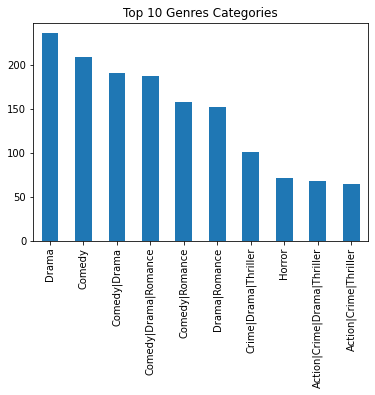

In [12]:
df.genres.value_counts()[:10].plot(kind='bar')
plt.title('Top 10 Genres Categories')

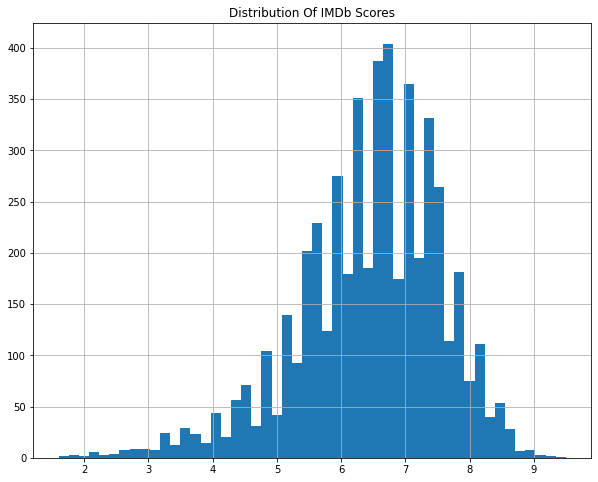

In [25]:
df.hist(bins=50, figsize=(10, 8))
plt.title('Distribution Of IMDb Scores')
plt.show()

In [13]:
# Fetch genres of all movies, unique genres
# for i in df.index:
#     print(df.loc[i, 'genres'])

In [14]:
genres_all_movies = [df.loc[i, 'genres'].split('|') for i in df.index]

genres = [item for sublist in genres_all_movies for item in sublist]
genres = sorted(list(set(genres)))
print(genres)

['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']


In [15]:
len(genres)

26

In [16]:
# Initialize lists for movie data as well as titles 
full_data = []
movie_titles = []

In [17]:
print(df)

                                            movie_title  \
0                                               Avatar    
1             Pirates of the Caribbean: At World's End    
2                                              Spectre    
3                                The Dark Knight Rises    
4     Star Wars: Episode VII - The Force Awakens    ...   
...                                                 ...   
5038                           Signed Sealed Delivered    
5039                         The Following                
5040                              A Plague So Pleasant    
5041                                  Shanghai Calling    
5042                                 My Date with Drew    

                               genres  imdb_score  \
0     Action|Adventure|Fantasy|Sci-Fi         7.9   
1            Action|Adventure|Fantasy         7.1   
2           Action|Adventure|Thriller         6.8   
3                     Action|Thriller         8.5   
4                         

In [18]:
df.to_csv('test.csv')

In [19]:
for i in df.index:
    # Append movie title and the index of the movie and the imdb link
    movie_titles.append((df.loc[i]['movie_title'].strip(), i, df.loc[i]['movie_imdb_link'].strip()))

    # Append the list of genres of the movies (1/0) to movie data 
    movie_data = [1 if genre in df.loc[i]['genres'].split('|') else 0 for genre in genres]

    # Add IMDb score of the movie to the movie data
    movie_data.append(df.loc[i]['imdb_score'])
    
    # Append the movie data to the full data
    full_data.append(movie_data)

In [20]:
print(movie_titles[1])

("Pirates of the Caribbean: At World's End", 1, 'http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1')


In [21]:
import json

# print(movie_titles)
data_dump = './data/movie_data.json'
titles_dump = './data/movie_titles.json'
with open(data_dump, 'w+', encoding='utf-8') as f:
    json.dump(full_data, f)
with open(titles_dump, 'w+', encoding='utf-8') as f:
    json.dump(movie_titles, f)